In [418]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

In [419]:
ubicacion = r"C:\Users\randy\EBAC.PRACTICAS\drugs (1).csv"
df = pd.read_csv('drugs (1).csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [420]:
# Checamos los valores de la variable a predecir 'Drug'
valores_unicos_Drug = df['Drug'].unique()
print(valores_unicos_Drug)

['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [421]:
# Checamos los valores de la variable 'Cholesterol' para identificar que modificaciones se le pueden hacer
valores_unicos_cholesterol = df['Cholesterol'].unique()
print(valores_unicos_cholesterol)

['HIGH' 'NORMAL']


In [422]:
# Checamos los valores de la variable 'BP' para identificar que modificaciones se le pueden hacer
valores_unicos_BP = df['BP'].unique()
print(valores_unicos_BP)

['HIGH' 'LOW' 'NORMAL']


In [423]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [424]:
df_encoded = df.copy()

In [425]:
label_encoders = {}
feature_cools = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']

In [426]:
label_encoders = {}  # Guardar los encoders por si se necesitan después
for col in feature_cools:
    le = preprocessing.LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Guardar el encoder para futuras conversiones inversas

In [427]:
print(df_encoded)

     Age  Sex  BP  Cholesterol  Na_to_K   Drug
0      8    0   0            0      167  drugY
1     30    1   1            0       89  drugC
2     30    1   1            0       43  drugC
3     12    0   2            0       10  drugX
4     44    0   1            0      133  drugY
..   ...  ...  ..          ...      ...    ...
195   39    0   1            0       69  drugC
196    1    1   1            0       75  drugC
197   35    1   2            0       36  drugX
198    8    1   2            1      102  drugX
199   24    0   1            1       66  drugX

[200 rows x 6 columns]


In [428]:
from sklearn.preprocessing import LabelEncoder

# Separar variables predictoras y objetivo
X = df_encoded.drop(columns=['Drug'])  # Eliminar la variable objetivo

# Codificar la variable objetivo
le_drug = LabelEncoder()
y = le_drug.fit_transform(df_encoded['Drug'])  # Convertir 'Drug' en valores numéricos

In [429]:
# Creacion de grupos de entrenamiento 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [430]:
# Crear objeto de clasificacion y objeto de decisión  
clf = DecisionTreeClassifier()

# Aplicación del algoritmo de arboles de decisión a los grupos de entrenamiento
clf = clf.fit(X_train, y_train)

# Predicción de la respuesta para el grupo de prueba
y_pred = clf.predict(X_test)

# Comparamos la variable 'Y_test' con 'Y_pred'

In [431]:
y_test[:5]

array([3, 4, 3, 2, 4])

In [432]:
y_pred[:5]

array([3, 4, 3, 2, 4])

In [433]:
# Matriz de confunsión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 4,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 13,  0],
       [ 0,  0,  1,  0, 16]], dtype=int64)

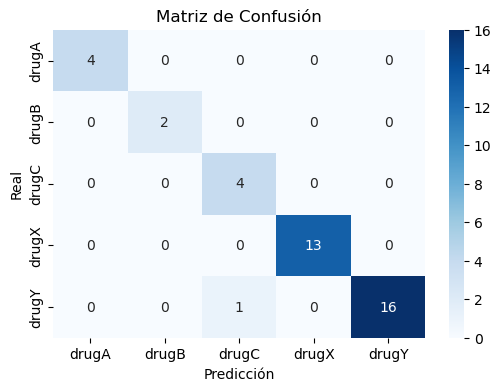

In [434]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le_drug.classes_, yticklabels=le_drug.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [435]:
# Estadisticas de Desempeño
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00        13
           4       1.00      0.94      0.97        17

    accuracy                           0.97        40
   macro avg       0.96      0.99      0.97        40
weighted avg       0.98      0.97      0.98        40



# Como Obtuve problemas con el modelo y los scores son muy cercanos al %100 de eficacia voy comprobar con una validacion cruzada

In [436]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy promedio:", scores.mean())

Accuracy promedio: 0.985


In [437]:
from sklearn import tree
import graphviz
import pydotplus
from PIL import Image

In [438]:
# Creación de informacion para el arbol (reglas de decisión)
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = feature_cools, class_names= ['drugY', 'drugC', 'drugX', 'drugA', 'drugB'])

# Creacion de la grafica del arbol 
graph = pydotplus.graph_from_dot_data(dot_data)

In [439]:
# Creacion del arbol en formato PDF
graph.write_pdf('Drugs.pdf')

# Creacion del arbol en fromato PNG
graph.write_png('Drugs.png')

image = Image.open('Drugs.png')
image.show()

In [440]:
# Crear objeto de clasificacion y objeto de decisión  
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3) 

# Aplicación del algoritmo de arboles de decisión a los grupos de entrenamiento
clf = clf.fit(X_train, y_train)

# Predicción de la respuesta para el grupo de prueba
y_pred = clf.predict(X_test)

In [441]:
# Estadisticas de Desempeño
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         4
           3       0.72      1.00      0.84        13
           4       1.00      0.94      0.97        17

    accuracy                           0.88        40
   macro avg       0.74      0.79      0.76        40
weighted avg       0.81      0.88      0.83        40



In [442]:
# Creación de informacion para el arbol (reglas de decisión)
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = feature_cools, class_names= ['drugY', 'drugC', 'drugX', 'drugA', 'drugB'])

# Creacion de la grafica del arbol 
graph = pydotplus.graph_from_dot_data(dot_data)

In [443]:
# Creacion del arbol en formato PDF
graph.write_pdf('Drugs.pdf')

# Creacion del arbol en fromato PNG
graph.write_png('Drugs.png')

image = Image.open('Drugs.png')
image.show()

# La optimizacion de desempeño que mejor resultados nos arrojo fue que viene por Default, en este caso nos arrojo una valoracion global del %97 
## Tambien podemos notar los porcentajes de Determinacion de niveles de presicion son muy altos, es por esto que nos quedamos con el ajuste que viene por default

In [444]:
# Crear objeto de clasificacion y objeto de decisión  
clf = DecisionTreeClassifier()

# Aplicación del algoritmo de arboles de decisión a los grupos de entrenamiento
clf = clf.fit(X_train, y_train)

# Predicción de la respuesta para el grupo de prueba
y_pred = clf.predict(X_test)

In [445]:
# Estadisticas de Desempeño
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00        13
           4       1.00      0.94      0.97        17

    accuracy                           0.97        40
   macro avg       0.96      0.99      0.97        40
weighted avg       0.98      0.97      0.98        40



In [446]:
# Adicion de colores del arbol de decision
from six import StringIO
from IPython.display import Image
from  sklearn.tree import export_graphviz

In [447]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_cools, class_names=['drugY', 'drugC', 'drugX', 'drugA', 'drugB'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [448]:
import os
print(os.getcwd())  # Muestra el directorio de trabajo actual

c:\Users\randy\EBAC.PRACTICAS


In [449]:
# Creacionn de archivo PNG
from PIL import Image
graph.write_png(r'c:\Users\randy\EBAC.PRACTICAS\Drugs.png')
image = Image.open('Drugs.png')
image.show()

# ¿Qué medicamento recomendaría utilizar para un paciente con los siguientes datos? 

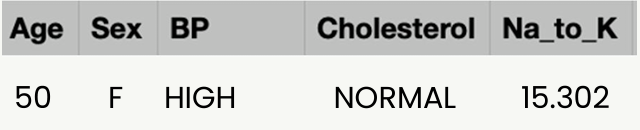

In [464]:
from IPython.display import Image

# Ruta de la imagen
ruta_imagen = "C:/Users/randy/EBAC.PRACTICAS/m23 2.png"

# Mostrar la imagen
Image(filename=ruta_imagen)

In [458]:
# Preparar los datos del paciente
paciente = pd.DataFrame({
    'Age': [50],
    'Sex': ['F'],
    'BP': ['HIGH'],
    'Cholesterol': ['NORMAL'],
    'Na_to_K': [15.302]
})

In [459]:
# Codificar las variables categóricas
for col in ['Sex', 'BP', 'Cholesterol']:
    paciente[col] = label_encoders[col].transform(paciente[col])


In [460]:
# Predecir el medicamento
prediccion = clf.predict(paciente)
medicamento_recomendado = le_drug.inverse_transform(prediccion)[0]


In [461]:
# Obtener probabilidades de predicción
probabilidades = clf.predict_proba(paciente)

In [462]:
# Imprimir resultados
print("Medicamento recomendado:", medicamento_recomendado)
print("\nProbabilidades de cada medicamento:")
for clase, probabilidad in zip(le_drug.classes_, probabilidades[0]):
    print(f"{clase}: {probabilidad:.2%}")

Medicamento recomendado: drugB

Probabilidades de cada medicamento:
drugA: 0.00%
drugB: 100.00%
drugC: 0.00%
drugX: 0.00%
drugY: 0.00%
